In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi, sqrt, log
import ast
from sklearn.metrics import confusion_matrix
import itertools


def ReadData(filename):
    Arr = []
    Brr = []
    count = 0
    label = 1
    depth = 0
    with open(filename, 'r') as fp:
        line = fp.readlines()
        for row in line:
            # print(row)
            depth += 1
            row = list(map(float, row.split(" ")))
            Arr.append(row)
            # print(row)
            Brr.append(label)
            count += 1
            if count == 10:
                label += 1
                count = 0
    Arr = np.asarray(Arr)
    Brr = np.asarray(Brr)
    return Arr, Brr

def ConfusionMatrix(actual, predicted):
    classes = np.array(['class 1', 'class 2'])
    cnf_matrix = confusion_matrix(actual, predicted)
    np.set_printoptions(precision=2)
    plt.figure()
    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                horizontalalignment="center",
                color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig("cnf_matrix.png")


In [8]:
TrainX ,TrainY = ReadData('bookData.txt')
print(TrainX.shape)
print(TrainY.shape)
# print(TrainY)

def Mean(trainx):
    arr = np.zeros((2, 3), dtype=float)
    for i in range(2):
        count = i*10
        sum = [0, 0, 0]
        for j in range(0, 10):
            # print("I+J" ,count+j)
            sum[0] += trainx[count+j, 0]
            sum[1] += trainx[count+j, 1]
            sum[2] += trainx[count+j, 2]
            print(trainx[count+j, 0])
        sum[0] /= 10
        sum[1] /= 10
        sum[2] /= 10
        arr[i, 0] = sum[0]
        arr[i, 1] = sum[1]
        arr[i, 2] = sum[2]
    # print(arr)
    return arr

# def Mean2(trainx):
#     mean1 = 0
#     for i in range(0, 10):
#         mean1 += trainx[i, 0]
#     mean1 = mean1/10

#     mean2 = 0
#     for i in range(10, 20):
#         mean2 += trainx[i, 0]
#     mean2 = mean2/10
#     return [mean1, mean2]

def Variance(trainx, mean):
    arr = np.zeros((2, 3), dtype=float)
    for i in range(2):
        count = i*10
        sum = [0, 0, 0]
        for j in range(0, 10):
            # print("c", count+j)
            sum[0] += ((trainx[count+j ,0]-mean[i, 0])**2)
            sum[1] += ((trainx[count+j, 1]-mean[i, 1])**2)
            sum[2] += ((trainx[count+j ,2]-mean[i, 2])**2)

        sum[0] = sum[0]/10
        sum[1] = sum[1]/10
        sum[2] = sum[2]/10
        arr[i, 0] = sum[0]
        arr[i, 1] = sum[1]
        arr[i, 2] = sum[2]
    # print(arr)
    return arr

meanData = Mean(TrainX)
print(meanData)
# meanData = Mean2(TrainX)
# print(meanData)
varianceData = Variance(TrainX, meanData)


(20, 3)
(20,)
-5.01
-5.43
1.08
0.86
-2.67
4.94
-2.51
-2.25
5.56
1.03
-0.91
1.3
-7.75
-5.47
6.14
3.6
5.37
7.18
-7.39
-7.5
[[-0.44 -1.75 -0.77]
 [-0.54 -0.76 -0.54]]


[[-0.44 -1.75 -0.77]
 [-0.54 -0.76 -0.54]]
0.024743833543844518 0.02564127000992674 1
0.0211885081386825 0.024165853410172466 1
0.05071168075497818 0.03329701412433478 1
0.05194180184642434 0.03363307113640368 1
0.04575482072819282 0.032361124603122925 1
0.018123644588888817 0.022014690621499158 1
0.046987252395244816 0.03268247027304071 1
0.048854614543654376 0.033156814609201016 1
0.013799629223251165 0.019753931219264217 1
0.0510054167178732 0.03337737399555009 1
0.054975022697075646 0.03457637911993045 2
0.04932588637096341 0.03291621595296631 2
0.00703600848533539 0.0158266602684851 2
0.02086295393048793 0.024023175552538717 2
0.01040996288707821 0.01766326363740512 2
0.029514100773484903 0.026743293987617656 2
0.01504926665037479 0.02044608153173038 2
0.005884007545100501 0.014090290951002395 2
0.008579408734781543 0.017081832551090987 2
0.008083527944573825 0.01669501920910946 2
EE 35.0
65.0
0.4739967077563055


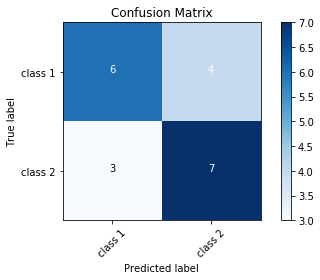

In [9]:

def lh(x, mean, variance):
    twosigma = 2*variance
    num = exp(-((x-mean)**2/twosigma))
    den = sqrt(pi*twosigma)
    return num/den

def Testing(trainx, label, mean, variance):
    Correct = 0
    predL = np.zeros((label.shape[0], ), dtype=int)
    print(mean)
    for i in range(20):
        x = trainx[i, 0]
        m = mean[0, 0]
        var = variance[0, 0]
        prob1 = lh(x, m, var)*0.5

        m = mean[1, 0]
        var = variance[1, 0]
        prob2 = lh(x, m, var)*0.5
        print(prob1, prob2, label[i])
        if prob1 > prob2:
            predL[i] = 1
            if label[i] == 1:
                Correct += 1
        else:
            predL[i] = 2
            if label[i] == 2:
                Correct += 1
    print("EE", (20-Correct)*100/20)
    print((Correct/20)*100)
    return predL

predL = Testing(TrainX, TrainY, meanData, varianceData)
# print("Acc:", acc)
ConfusionMatrix(TrainY, predL)


# Bhattacharyya Bound
def BB(pw1, pw2, u1, u2, s1, s2):
    expo = (1/8)*(u2-u1)*(1/((s1+s2)/2))*(u2-u1)+(1/2)*(log(abs((s1+s2)/2)/sqrt(abs(s1)*abs(s2))))
    prod = sqrt(pw1*pw2)
    return prod*exp(-expo)

bbound = BB(0.5, 0.5, meanData[0, 0], meanData[1, 0], varianceData[0, 0], varianceData[1, 0])
print(bbound)

0.0014211606209736433 0.0004482229288718194
0.002623770365450669 0.00283378483050492
0.002165210607135787 0.0010312707839658613
0.0045483109538247265 0.0023683078125444207
0.0030229191289113076 0.003424728497703634
0.001837277810562363 0.0020175560032012303
0.0016713182282132996 0.0023122980781732187
0.006223924582712513 0.004126840945999839
0.0016145527427531227 0.0020906899122680772
0.004919904255839944 0.0026956479528815664
0.005985962846663612 0.004385491775827065
0.005898311497513356 0.003604609609813529
0.0008542102629005252 0.0017240445718394825
0.0007444300855775567 0.002182898739128726
0.0005923456043408422 0.000721028850850955
0.003686694019200948 0.0033305539762169315
0.0002927600217024858 0.0005426467820866666
0.0007335522351232914 0.001830133715444098
0.0001082674664651187 0.0010367971091948644
0.001014484871353068 0.0010605226213412668
EE 40.0
60.0
[1 2 1 1 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2]


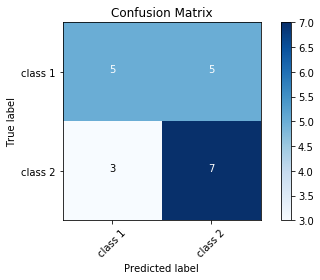

In [10]:
# Now for two feature values x1, x2

def llmd(x, m, cm):
    # print("X", x)
    # print("m", m)
    # print("cm", cm)

    sub = np.subtract(x, m)
    # print("sub", sub)
    num = exp((-1/2)*(np.matmul(np.matmul(sub, np.linalg.inv(cm)), np.transpose(sub))))
    # print("numnum", num)
    den = 2*pi*sqrt(np.linalg.det(cm))
    return num/den

def findCovMat(trainx, mean):
    mus = [0, 0]
    for i in range(0, 10):
        mus[0] += (trainx[i, 0]-mean[0, 0])*(trainx[i, 1]-mean[0, 1])
        # if i == 0:
            # print(mus)
    mus[0] = mus[0]/10

    for i in range(10, 20):
        mus[1] += (trainx[i, 0]-mean[1, 0])*(trainx[i, 1]-mean[1, 1])
    mus[1] = mus[1]/10
    return mus

CovM = findCovMat(TrainX, meanData)

cov = np.array([
    [varianceData[0, 0], CovM[0]], 
    [CovM[0], varianceData[0, 1]]
])
cov2 = np.array([
    [varianceData[1, 0], CovM[1]],
    [CovM[1], varianceData[1, 1]]
])
u1 = np.array([meanData[0, 0], meanData[0, 1]])
u2 = np.array([meanData[1, 0], meanData[1, 1]])

def Test2Points(trainx, labels, cov, cov2, u1, u2):
    Correct = 0
    PredictL = np.zeros((labels.shape[0], ), dtype=int)
    for i in range(20):
        xy = np.array([trainx[i, 0], trainx[i, 1]])
        prob1 = llmd(xy, u1, cov)*0.5
        prob2 = llmd(xy, u2, cov2)*0.5
        print(prob1, prob2)
        # return None
        if prob1 > prob2:
            PredictL[i] = 1
            if labels[i] == 1:
                Correct += 1
        else:
            PredictL[i] = 2
            if labels[i] == 2:
                Correct += 1
    print("EE", (20-Correct)*100/20)
    print(Correct*100/20)
    return PredictL

predL = Test2Points(TrainX, TrainY, cov, cov2, u1, u2)
print(predL)

ConfusionMatrix(TrainY, predL)


In [11]:
# Bhattacharyya bound
def BB2(pw1, pw2, u1, u2, cov, cov2):
    sub = np.subtract(u2, u1)
    # print("sub", sub)
    # print("sum", cov+cov2/2)
    covSum = (cov+cov2)/2
    num = (1/8)*np.matmul(np.matmul(sub, np.linalg.inv(covSum)), np.transpose(sub))
    # print("numnum", num)
    num += (1/2)*log(np.linalg.det(covSum)/sqrt(abs(np.linalg.det(cov))*abs(np.linalg.det(cov2))))
    den = sqrt(pw1*pw2)*exp(-num)
    return den
bound = BB2(0.5, 0.5, u1, u2, cov, cov2)
print(bound)



0.4598473337467808


0.00013589609970088065 4.570838057004407e-05
0.00024117393308635757 0.00011134692857175492
0.00016975794896568805 2.4699619353211684e-05
0.0003229393316359832 0.0002968031429014125
3.8161133265366816e-05 4.825319987196151e-05
0.00017583408200797166 0.00011165840205289005
0.00014504354375875284 9.267182963184873e-05
0.0002240192737212451 3.425386321881614e-05
0.0001108340272655788 0.00029449323920634836
0.00022233625428012322 1.8541472872045395e-05
0.0005834468680219639 0.0006179959185004991
0.0004363835547918442 0.0004543735799614807
7.673326237942019e-05 0.0001507470374082337
3.089150913026405e-05 0.0002864087362839321
1.543634578429961e-05 4.730367575572752e-05
0.00023214893020639818 3.8631937296328425e-05
1.9508207549259636e-05 5.8796886355758474e-05
1.0621540639164653e-05 0.0001611377249565615
1.533282105005658e-06 0.00011253440117333013
8.116049650497998e-05 0.00013742914969587367
EE 15.0
85.0


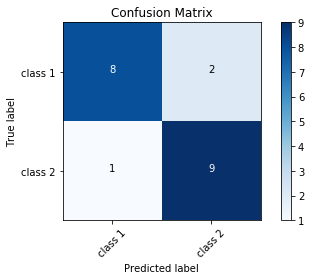

In [12]:
# For all 3 features x1, x2, x3

def llmd(x, m, cm):
    sub = x-m
    num = exp((-1/2)*(np.matmul(np.matmul(sub, np.linalg.inv(cm)), np.transpose(sub))))
    den = ((2*pi)**(3/2))*sqrt(np.linalg.det(cm))
    return num/den

def findCovMat(trainx, mean):
    mus = np.zeros((3, 3), dtype=float)
    # print(mus)
    for i in range(0, 10):
        mus[0, 1] += (trainx[i, 0]-mean[0, 0])*(trainx[i, 1]-mean[0, 1])
        mus[0, 2] += (trainx[i, 0]-mean[0, 0])*(trainx[i, 2]-mean[0, 2])
        mus[1, 2] += (trainx[i, 1]-mean[0, 1])*(trainx[i, 2]-mean[0, 2])
    mus[0, 1] = mus[0, 1]/10
    mus[0, 2] = mus[0, 2]/10
    mus[1, 2] = mus[1, 2]/10
    mus[1, 0] = mus[0, 1]
    mus[2, 0] = mus[0, 2]
    mus[2, 1] = mus[1, 2]

    mus2 = np.zeros((3, 3), dtype=float)
    for i in range(10, 20):
        mus2[0, 1] += (trainx[i, 0]-mean[1, 0])*(trainx[i, 1]-mean[1, 1])
        mus2[0, 2] += (trainx[i, 0]-mean[1, 0])*(trainx[i, 2]-mean[1, 2])
        mus2[1, 2] += (trainx[i, 1]-mean[1, 1])*(trainx[i, 2]-mean[1, 2])
    mus2[0, 1] = mus2[0, 1]/10
    mus2[0, 2] = mus2[0, 2]/10
    mus2[1, 2] = mus2[1, 2]/10
    mus2[1, 0] = mus2[0, 1]
    mus2[2, 0] = mus2[0, 2]
    mus2[2, 1] = mus2[1, 2]
    return mus, mus2

CovM1, CovM2 = findCovMat(TrainX, meanData)

cov = np.array([
    [varianceData[0, 0], CovM1[0, 1], CovM1[0, 2]], 
    [CovM1[1, 0], varianceData[0, 1], CovM1[1, 2]],
    [CovM1[2, 0], CovM1[2, 1], varianceData[0, 2]]
])

cov2 = np.array([
    [varianceData[1, 0], CovM2[0, 1], CovM2[0, 2]], 
    [CovM2[1, 0], varianceData[1, 1], CovM2[1, 2]],
    [CovM2[2, 0], CovM2[2, 1], varianceData[1, 2]]
])
u1 = np.array([meanData[0, 0], meanData[0, 1], meanData[0, 2]])
u2 = np.array([meanData[1, 0], meanData[1, 1], meanData[1, 2]])

def Test3Points(trainx, labels, cov, cov2, u1, u2):
    Correct = 0
    predL = np.zeros((TrainY.shape[0], ), dtype=int)
    for i in range(20):
        xy = np.array([trainx[i, 0], trainx[i, 1], trainx[i, 2]])
        prob1 = llmd(xy, u1, cov)*0.5
        prob2 = llmd(xy, u2, cov2)*0.5
        print(prob1, prob2)
        # return None
        if prob1 > prob2:
            predL[i] = 1
            if labels[i] == 1:
                Correct += 1
        else:
            predL[i] = 2
            if labels[i] == 2:
                Correct += 1
    print("EE", (20-Correct)*100/20)
    print((Correct*100/20))
    return predL

predL = Test3Points(TrainX, TrainY, cov, cov2, u1, u2)
# print(predL)

ConfusionMatrix(TrainY, predL)


In [13]:
# Bhattacharyya bound
def BB3(pw1, pw2, u1, u2, cov, cov2):
    sub = np.subtract(u2, u1)
    # print("sub", sub)
    # print("sum", cov+cov2/2)
    covSum = (cov+cov2)/2
    num = (1/8)*np.matmul(np.matmul(sub, np.linalg.inv(covSum)), np.transpose(sub))
    # print("numnum", num)
    num += (1/2)*log(np.linalg.det(covSum)/sqrt(abs(np.linalg.det(cov))*abs(np.linalg.det(cov2))))
    den = sqrt(pw1*pw2)*exp(-num)
    return den
    
bound = BB3(0.5, 0.5, u1, u2, cov, cov2)
print(bound)


0.41135720223919536
